Question 1:  What is a Decision Tree, and how does it work in the context of classification?

A Decision Tree is a supervised learning algorithm used for both classification and regression tasks.

*  It splits the dataset into smaller subsets based on feature values.





*  Each internal node represents a decision on a feature.

*  Each branch represents the outcome of the decision.

*  Each leaf node represents a final prediction (class label for classification, numerical value for regression).

🔹 How it works in classification:

*  The algorithm selects the "best" feature to split data (using criteria like Gini Impurity or Entropy).

*  This process is repeated recursively, creating a tree structure until stopping conditions are met (e.g., maximum depth, pure nodes).

*  At prediction time, a new instance is passed down the tree until it reaches a leaf, where the class label is assigned.

Question 2: Explain the concepts of Gini Impurity and Entropy as impurity measures.
How do they impact the splits in a Decision Tree?

# 1. Gini Impurity

Formula:

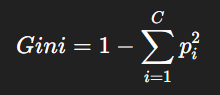
	​


where
𝑝𝑖 = probability of class i.

*  It measures the likelihood of incorrect classification if a sample was randomly labeled according to the class distribution.

# 2. Entropy (used in Information Gain)

Formula:
 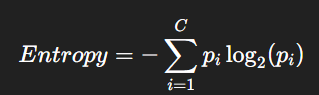
*  It measures the level of disorder or uncertainty in the dataset.

🔹 Impact on Splits:

*  Both are used to evaluate “purity” after a split.

*  The algorithm chooses the split that reduces impurity the most.

*  Gini is faster to compute; Entropy is more theoretical (linked to Information Theory).

Question 3: What is the difference between Pre-Pruning and Post-Pruning in Decision
Trees? Give one practical advantage of using each.

###Pre-Pruning (Early Stopping):
*   Stop the tree from growing too deep (e.g., set max_depth, min_samples_split).
*       Advantage: Prevents overfitting early, faster training.

### Post-Pruning (Reduced Error Pruning):
*  Build a full tree first, then prune unnecessary branches using validation set performance.
*       Advantage: Often results in better generalization since pruning is based on evidence.

Question 4: What is Information Gain in Decision Trees, and why is it important for
choosing the best split?

###Information Gain (IG): Measures the reduction in entropy after a dataset split.

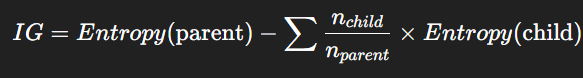

#   Importance:

*  Helps decide the best feature to split on.

*  Higher IG = better separation of classes.

*  Ensures tree grows in a way that maximizes predictive power.

Question 5: What are some common real-world applications of Decision Trees, and
what are their main advantages and limitations?

###Applications:

* Healthcare: Disease diagnosis.

* Finance: Credit risk scoring.

* Retail: Customer segmentation.

* Manufacturing: Quality control.

###Advantages:

* Easy to interpret.

* Handles both categorical & numerical data.

* No need for feature scaling.

###Limitations:

* Can easily overfit.

* Sensitive to small data changes.

* Greedy algorithm (locally optimal, not globally).

**Dataset Info:**

**● Iris Dataset for classification tasks (sklearn.datasets.load_iris() or
provided CSV).**

● **Boston Housing Dataset for regression tasks
(sklearn.datasets.load_boston() or provided CSV).**

Question 6:   Write a Python program to:

● Load the Iris Dataset

● Train a Decision Tree Classifier using the Gini criterion

● Print the model’s accuracy and feature importances

(Include your Python code and output in the code box below.)

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree with Gini
clf = DecisionTreeClassifier(criterion="gini", random_state=42)
clf.fit(X_train, y_train)

# Accuracy
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature importances
print("Feature Importances:", clf.feature_importances_)


Accuracy: 1.0
Feature Importances: [0.         0.01911002 0.89326355 0.08762643]


Question 7:  Write a Python program to:

● Load the Iris Dataset

● Train a Decision Tree Classifier with max_depth=3 and compare its accuracy to
a fully-grown tree.

(Include your Python code and output in the code box below.)

In [2]:
# Fully grown tree
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)
acc_full = accuracy_score(y_test, clf_full.predict(X_test))

# Pruned tree
clf_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_pruned.fit(X_train, y_train)
acc_pruned = accuracy_score(y_test, clf_pruned.predict(X_test))

print("Full Tree Accuracy:", acc_full)
print("Pruned Tree Accuracy:", acc_pruned)


Full Tree Accuracy: 1.0
Pruned Tree Accuracy: 1.0


Question 8: Write a Python program to:

● Load the California Housing dataset from sklearn

● Train a Decision Tree Regressor

● Print the Mean Squared Error (MSE) and feature importances

(Include your Python code and output in the code box below.)

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)

# Predictions
y_pred = reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("Feature Importances:", reg.feature_importances_)


MSE: 0.5280096503174904
Feature Importances: [0.52345628 0.05213495 0.04941775 0.02497426 0.03220553 0.13901245
 0.08999238 0.08880639]


Question 9: Write a Python program to:

● Load the Iris Dataset

● Tune the Decision Tree’s max_depth and min_samples_split using
GridSearchCV

● Print the best parameters and the resulting model accuracy

(Include your Python code and output in the code box below.)

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target   # y is categorical (0,1,2)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Define parameter grid
param_grid = {
    "max_depth": [2, 3, 4, 5, None],
    "min_samples_split": [2, 5, 10]
}

# Grid search with Decision Tree Classifier
grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5
)

grid.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Evaluate on test set
y_pred = grid.best_estimator_.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))



Best Parameters: {'max_depth': 4, 'min_samples_split': 10}
Best CV Accuracy: 0.9428571428571428
Test Accuracy: 1.0


Question 10: Imagine you’re working as a data scientist for a healthcare company that
wants to predict whether a patient has a certain disease.

You have a large dataset with
mixed data types and some missing values.

Explain the step-by-step process you would follow to:

● Handle the missing values

● Encode the categorical features

● Train a Decision Tree model

● Tune its hyperparameters

● Evaluate its performance

And describe what business value this model could provide in the real-world
setting.

## Step-by-step process:

####1. Handle Missing Values

    *  Numerical: Impute with mean/median.

    *  Categorical: Impute with mode or "Unknown" category.

####2. Encode Categorical Features

    * Use One-Hot Encoding (for nominal data).

    * Use Ordinal Encoding (for ordered categories).

####3. Train Decision Tree Model

    * Choose `criterion="gini"` or `"entropy"` .

    * Split into training/test sets.

####4. Hyperparameter Tuning

Use GridSearchCV to optimize `max_depth` , `min_samples_split` , `min_samples_leaf` .

####5. Evaluate Model

Metrics: Accuracy, Precision, Recall, F1-score, ROC-AUC.

##Business Value:

   *  Helps in early disease detection.

   *  Assists doctors in decision-making.

   *  Reduces healthcare costs by identifying high-risk patients.

   *  Improves patient outcomes through timely intervention.